<a href="https://colab.research.google.com/github/jose-ns/TelecomX_parte2_Latam/blob/main/TelecomX_parte2_Latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**🔧 Preparación de los datos**

## Extracción del Archivo Tratado

In [ ]:
#Cargar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Cargar Datos
url = 'https://gist.githubusercontent.com/jose-ns/c7ed7427338c5661eb1cc9fe5784d7eb/raw/1472691b247b92c06909da1293f03157f801e176/df_telecom_limpio.csv'
df = pd.read_csv(url)
df.head()

,customerID,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,...,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,Monthly_Charge,Total_Charge,Cuentas_Diarias,customer_gender
0,0002-ORFBO,0,0,1,1,9,1,0,DSL,0,...,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667,0
1,0003-MKNFE,0,0,0,0,9,1,1,DSL,0,...,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667,1
2,0004-TLHLJ,1,0,0,0,4,1,0,Fiber optic,0,...,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333,1
3,0011-IGKFF,1,1,1,0,13,1,0,Fiber optic,0,...,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667,1
4,0013-EXCHZ,1,1,1,0,3,1,0,Fiber optic,0,...,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667,0


##Eliminación de Columnas Irrelevantes

In [ ]:
#Revisar contenido columnas
for col in df.columns:
    print(f'{col}: {df[col].nunique()}')

customerID: 7043
Churn: 2
customer_SeniorCitizen: 2
customer_Partner: 2
customer_Dependents: 2
customer_tenure: 73
phone_PhoneService: 2
phone_MultipleLines: 2
internet_InternetService: 3
internet_OnlineSecurity: 2
internet_OnlineBackup: 2
internet_DeviceProtection: 2
internet_TechSupport: 2
internet_StreamingTV: 2
internet_StreamingMovies: 2
account_Contract: 3
account_PaperlessBilling: 2
account_PaymentMethod: 4
Monthly_Charge: 1585
Total_Charge: 6530
Cuentas_Diarias: 1585
customer_gender: 2


In [ ]:
#Eliminar columnas irrelevantes
df.drop(columns=['customerID'], inplace=True)

In [ ]:
df.head()

,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,...,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,Monthly_Charge,Total_Charge,Cuentas_Diarias,customer_gender
0,0,0,1,1,9,1,0,DSL,0,1,...,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667,0
1,0,0,0,0,9,1,1,DSL,0,0,...,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667,1
2,1,0,0,0,4,1,0,Fiber optic,0,0,...,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333,1
3,1,1,1,0,13,1,0,Fiber optic,0,1,...,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667,1
4,1,1,1,0,3,1,0,Fiber optic,0,0,...,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667,0


## Encoding

In [ ]:
# Codificación one-hot / 0 y 1
categorical_cols = ['internet_InternetService', 'account_Contract', 'account_PaymentMethod']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

print(df_encoded.head())
print(df_encoded.columns)

   Churn  customer_SeniorCitizen  customer_Partner  customer_Dependents  \
0      0                       0                 1                    1   
1      0                       0                 0                    0   
2      1                       0                 0                    0   
3      1                       1                 1                    0   
4      1                       1                 1                    0   

   customer_tenure  phone_PhoneService  phone_MultipleLines  \
0                9                   1                    0   
1                9                   1                    1   
2                4                   1                    0   
3               13                   1                    0   
4                3                   1                    0   

   internet_OnlineSecurity  internet_OnlineBackup  internet_DeviceProtection  \
0                        0                      1                          0   
1         

## Verificación de la Proporción de Cancelación (Churn)

In [ ]:
# Verificación Churn para evaluar posible desbalance
churn_counts = df_encoded['Churn'].value_counts()
churn_percent = df_encoded['Churn'].value_counts(normalize=True) * 100

print(f'Clientes que NO cancelaron (0): {churn_percent[0]:.2f}% ({churn_counts[0]})')
print(f'Clientes que SÍ cancelaron (1): {churn_percent[1]:.2f}% ({churn_counts[1]})')

Clientes que NO cancelaron (0): 73.46% (5174)
Clientes que SÍ cancelaron (1): 26.54% (1869)


## Balanceo de Clases (opcional)

In [ ]:
# Instalar la librería imbalanced-learn para SMOTE (solo si no está instalada)
!pip install -q imbalanced-learn

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separar features y target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Dividir en entrenamiento y prueba, estratificando para mantener proporciones
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Rellenar valores nulos antes de aplicar SMOTE
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

# Aplicar SMOTE para balancear la clase minoritaria
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Mostrar distribución original y balanceada de clases
print('Distribución original en set de entrenamiento:')
print(y_train.value_counts())
print('\nDistribución después de aplicar SMOTE:')
print(y_train_bal.value_counts())

Distribución original en set de entrenamiento:
Churn
0    4139
1    1495
Name: count, dtype: int64

Distribución después de aplicar SMOTE:
Churn
0    4139
1    4139
Name: count, dtype: int64


## Normalización o Estandarización (si es necesario)

Reporte clasificación con datos originales:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Matriz de confusión con datos originales:
[[930 105]
 [191 183]]

Reporte clasificación con datos balanceados (SMOTE):
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1035
           1       0.57      0.61      0.59       374

    accuracy                           0.78      1409
   macro avg       0.71      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409

Matriz de confusión con datos balanceados (SMOTE):
[[865 170]
 [146 228]]


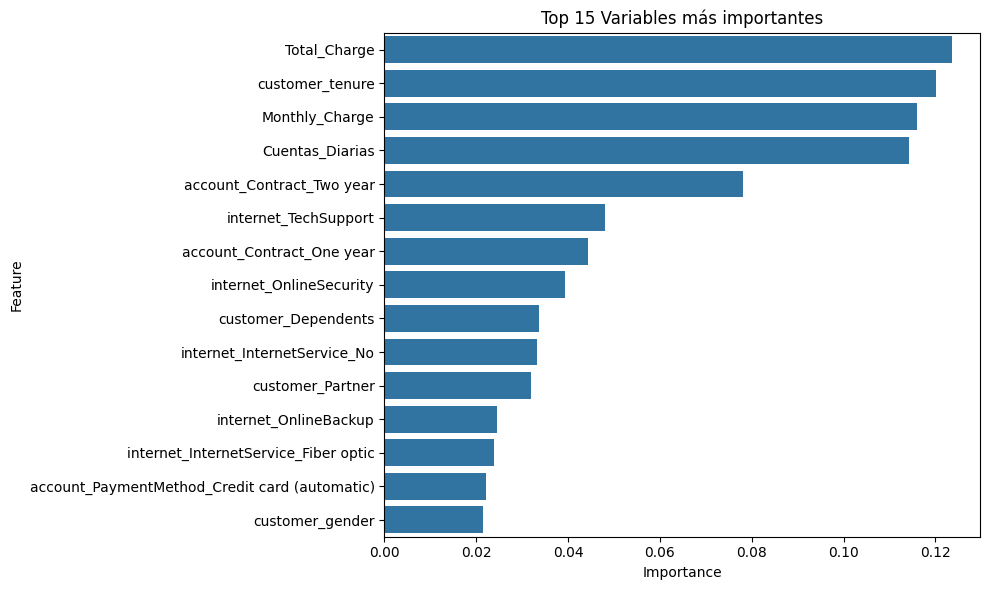

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Modelo con datos originales (sin balancear)
rf_orig = RandomForestClassifier(random_state=42, n_estimators=100)
rf_orig.fit(X_train, y_train)

y_pred_orig = rf_orig.predict(X_test)

print("Reporte clasificación con datos originales:")
print(classification_report(y_test, y_pred_orig))

print("Matriz de confusión con datos originales:")
print(confusion_matrix(y_test, y_pred_orig))


# Modelo con datos balanceados (SMOTE)
rf_bal = RandomForestClassifier(random_state=42, n_estimators=100)
rf_bal.fit(X_train_bal, y_train_bal)

y_pred_bal = rf_bal.predict(X_test)

print("\nReporte clasificación con datos balanceados (SMOTE):")
print(classification_report(y_test, y_pred_bal))

print("Matriz de confusión con datos balanceados (SMOTE):")
print(confusion_matrix(y_test, y_pred_bal))

importances = rf_bal.feature_importances_
features = X_train.columns

df_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
df_importances = df_importances.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(data=df_importances, x='Importance', y='Feature')
plt.title('Top 15 Variables más importantes')
plt.tight_layout()
plt.show()

#🎯 Correlación y Selección de Variables

##Análisis de Correlación

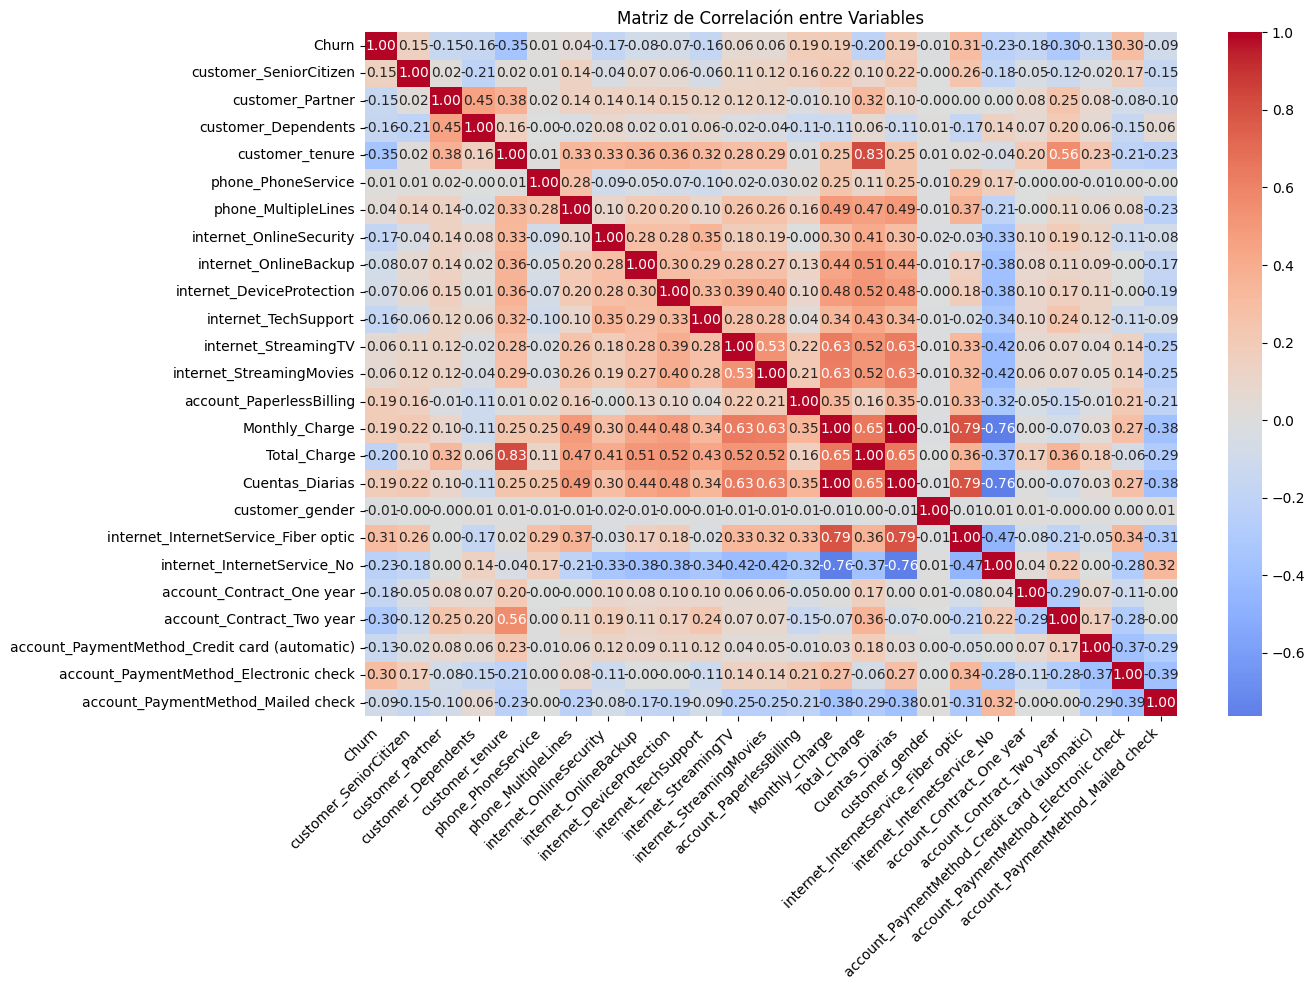

In [ ]:
# Calcular matriz de correlación
corr = df_encoded.corr(numeric_only=True)

# Crear figura
plt.figure(figsize=(14, 10))

# Mapa de calor
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)

plt.title('Matriz de Correlación entre Variables')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Correlación de todas las variables con 'Churn'
correlation_with_churn = corr['Churn'].drop('Churn').sort_values(ascending=False)

# Mostrar top correlaciones positivas y negativas
print("Variables con mayor correlación positiva con 'Churn':")
print(correlation_with_churn.head(5))

print("\nVariables con mayor correlación negativa con 'Churn':")
print(correlation_with_churn.tail(5))

Variables con mayor correlación positiva con 'Churn':
internet_InternetService_Fiber optic      0.308020
account_PaymentMethod_Electronic check    0.301919
Monthly_Charge                            0.193356
Cuentas_Diarias                           0.193356
account_PaperlessBilling                  0.191825
Name: Churn, dtype: float64

Variables con mayor correlación negativa con 'Churn':
account_Contract_One year     -0.177820
Total_Charge                  -0.199484
internet_InternetService_No   -0.227890
account_Contract_Two year     -0.302253
customer_tenure               -0.352229
Name: Churn, dtype: float64


##Análisis Dirigido

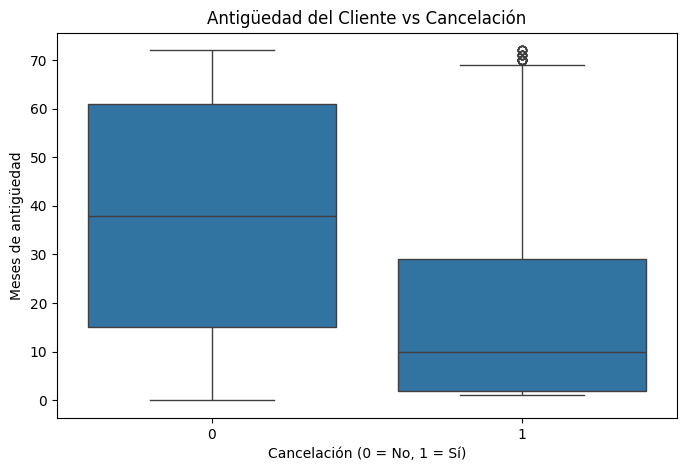

In [ ]:
# Boxplot de customer_tenure vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='customer_tenure', data=df_encoded)
plt.title('Antigüedad del Cliente vs Cancelación')
plt.xlabel('Cancelación (0 = No, 1 = Sí)')
plt.ylabel('Meses de antigüedad')
plt.show()

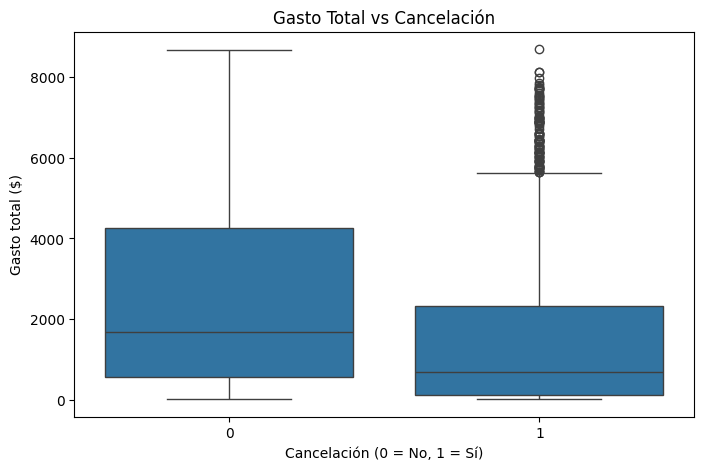

In [ ]:
# Boxplot de Total_Charge vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='Total_Charge', data=df_encoded)
plt.title('Gasto Total vs Cancelación')
plt.xlabel('Cancelación (0 = No, 1 = Sí)')
plt.ylabel('Gasto total ($)')
plt.show()

#🤖 Modelado Predictivo

## Separación de Datos

In [ ]:
# División del dataset en entrenamiento (80%) y prueba (20%)
from sklearn.model_selection import train_test_split

# Separar variables predictoras (X) y variable objetivo (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Separar en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


##Creación de Modelos

In [ ]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Imputar valores faltantes (NaN) con la media en train y test
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Aplicar SMOTE solo en set de entrenamiento imputado
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_imputed, y_train)

# Normalizar los datos para el modelo sensible a escala (Regresión Logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test_imputed)

# Entrenar Regresión Logística con datos normalizados y balanceados
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train_res)
y_pred_log = log_reg.predict(X_test_scaled)

print("Reporte clasificación - Regresión Logística:")
print(classification_report(y_test, y_pred_log))
print("Matriz de confusión - Regresión Logística:")
print(confusion_matrix(y_test, y_pred_log))

# Entrenar Random Forest con datos originales sin normalizar ni balancear
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_imputed, y_train)
y_pred_rf = rf.predict(X_test_imputed)

print("\nReporte clasificación - Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Matriz de confusión - Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

Reporte clasificación - Regresión Logística:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1035
           1       0.52      0.79      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409

Matriz de confusión - Regresión Logística:
[[759 276]
 [ 78 296]]

Reporte clasificación - Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Matriz de confusión - Random Forest:
[[930 105]
 [191 183]]


##Evaluación de los Modelos

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluar_modelo(y_true, y_pred, modelo_nombre):
    print(f"Evaluación del modelo: {modelo_nombre}")
    print(f"Exactitud (Accuracy): {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precisión (Precision): {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_true, y_pred):.4f}")
    print("Matriz de Confusión:")
    print(confusion_matrix(y_true, y_pred))
    print("\n")

# Para Regresión Logística
evaluar_modelo(y_test, y_pred_log, "Regresión Logística")

# Para Random Forest
evaluar_modelo(y_test, y_pred_rf, "Random Forest")

Evaluación del modelo: Regresión Logística
Exactitud (Accuracy): 0.7488
Precisión (Precision): 0.5175
Recall: 0.7914
F1-score: 0.6258
Matriz de Confusión:
[[759 276]
 [ 78 296]]


Evaluación del modelo: Random Forest
Exactitud (Accuracy): 0.7899
Precisión (Precision): 0.6354
Recall: 0.4893
F1-score: 0.5529
Matriz de Confusión:
[[930 105]
 [191 183]]




#📋 Interpretación y Conclusiones

##Análisis de la Importancia de las Variables

Variables más importantes según Random Forest:
                                  Variable  Importancia
14                            Total_Charge     0.172835
3                          customer_tenure     0.153113
13                          Monthly_Charge     0.136045
15                         Cuentas_Diarias     0.131744
17    internet_InternetService_Fiber optic     0.039520
22  account_PaymentMethod_Electronic check     0.035055
20               account_Contract_Two year     0.032863
16                         customer_gender     0.024845
12                account_PaperlessBilling     0.023713
19               account_Contract_One year     0.023589


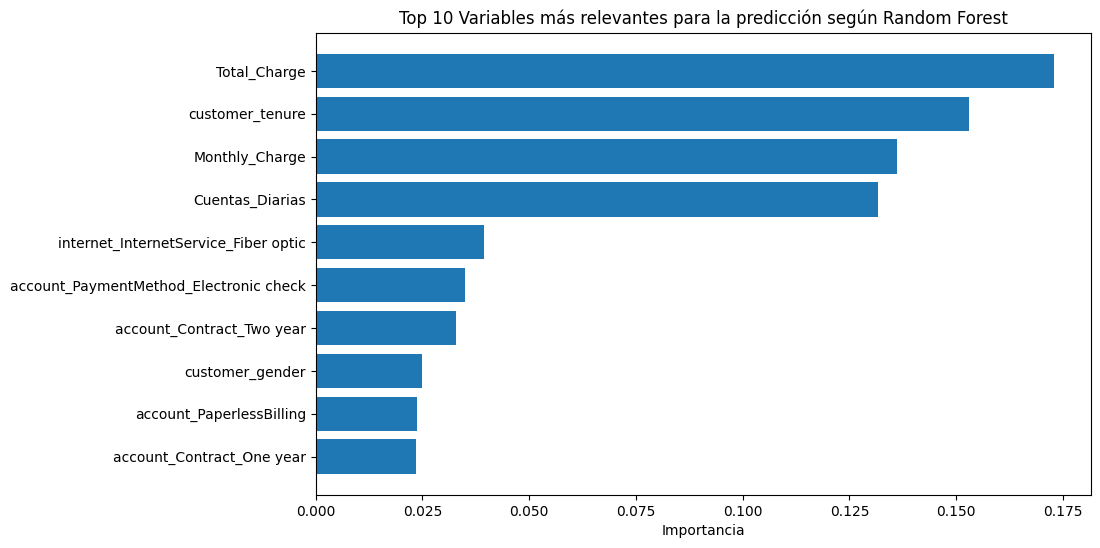

In [ ]:
# Obtener la importancia de las variables del modelo Random Forest
# Extraer importancias
importancias = rf.feature_importances_

# Crear un DataFrame con los nombres de las variables y su importancia
features = X_train.columns if hasattr(X_train, 'columns') else [f'feature_{i}' for i in range(X_train.shape[1])]
df_importancia = pd.DataFrame({
    'Variable': features,
    'Importancia': importancias
})

# Ordenar variables por importancia descendente
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False)

# Mostrar las variables más importantes
print("Variables más importantes según Random Forest:")
print(df_importancia.head(10))

# Visualizar con gráfico de barras
plt.figure(figsize=(10,6))
plt.barh(df_importancia['Variable'][:10][::-1], df_importancia['Importancia'][:10][::-1])
plt.xlabel('Importancia')
plt.title('Top 10 Variables más relevantes para la predicción según Random Forest')
plt.show()


In [ ]:
# Mostrar coeficientes de la Regresión Logística
coeficientes = pd.DataFrame({
    'Variable': features,
    'Coeficiente': log_reg.coef_[0]
})

# Ordenar por valor absoluto de coeficiente para ver variables más influyentes
coeficientes['AbsCoef'] = coeficientes['Coeficiente'].abs()
coeficientes = coeficientes.sort_values(by='AbsCoef', ascending=False)

print("Variables más influyentes según Regresión Logística:")
print(coeficientes.head(10)[['Variable', 'Coeficiente']])


Variables más influyentes según Regresión Logística:
                                  Variable  Coeficiente
3                          customer_tenure    -1.480504
14                            Total_Charge     0.811857
17    internet_InternetService_Fiber optic     0.775730
18             internet_InternetService_No    -0.630615
20               account_Contract_Two year    -0.567288
13                          Monthly_Charge    -0.512958
15                         Cuentas_Diarias    -0.512958
10                    internet_StreamingTV     0.269733
19               account_Contract_One year    -0.267853
22  account_PaymentMethod_Electronic check     0.255518


##**Conclusión**

### **📋 Informe Detallado**

---

#### 1 Factores Clave que Influyen en la Cancelación

Tras el análisis y modelado de los datos de **Telecom X**, se identificaron las variables más influyentes para predecir la cancelación de clientes (churn):

- 🌐 **Tipo de Servicio de Internet (Fibra Óptica):** Los clientes con servicio de fibra óptica presentan mayor probabilidad de cancelar, posiblemente debido a expectativas más altas o problemas técnicos específicos asociados a este servicio.

- 💳 **Método de Pago (Cheque Electrónico):** El uso de cheque electrónico está correlacionado con un mayor churn, lo que podría indicar problemas administrativos o de comodidad en el pago.

- 💸 **Cargos Mensuales Elevados:** Clientes con facturas mensuales más altas tienden a cancelar más, sugiriendo sensibilidad al precio o insatisfacción con la relación costo-beneficio.

- 📝 **Duración del Contrato:** Los clientes con contratos a largo plazo muestran menor tasa de cancelación, indicando que la fidelización contractual contribuye a la retención.

- ⏳ **Antigüedad del Cliente (Tenencia):** Clientes con mayor tiempo en la empresa tienen menor probabilidad de cancelar, reflejando una relación más consolidada.

---

#### 2 Rendimiento de los Modelos

- 📈 **Regresión Logística:**  
  Presentó un mejor *recall*, detectando con mayor sensibilidad a los clientes que realmente cancelan, aunque con menor precisión, lo que implica más falsos positivos. Esto es útil para estrategias donde se prefiera identificar la mayor cantidad posible de clientes en riesgo, aceptando alertas extra.

- 🌲 **Random Forest:**  
  Tuvo mayor *precisión* y *exactitud* global, aunque con menor capacidad para detectar todos los casos de churn. Es más conservador al predecir cancelaciones, lo que puede reducir esfuerzos innecesarios en clientes que no cancelarían.

---

#### 3 Estrategias de Retención Basadas en los Resultados

A partir de los factores identificados y el comportamiento de los modelos, se proponen las siguientes estrategias:

- 🛡️ **Promover contratos a largo plazo** ofreciendo incentivos y beneficios que aumenten la fidelidad y reduzcan la cancelación.

- 💰 **Revisar y ajustar los precios** y cargos mensuales para mejorar la percepción de valor y evitar que los costos sean un motivo de abandono.

- 🔧 **Mejorar la experiencia y soporte técnico** especialmente para clientes con servicio de fibra óptica, enfocándose en solucionar problemas que puedan llevar a la cancelación.

- 🧾 **Optimizar y facilitar los métodos de pago**, analizando alternativas más convenientes para los clientes que actualmente usan cheque electrónico.

- 🎯 **Diseñar campañas específicas para clientes nuevos** o con baja antigüedad, quienes presentan mayor riesgo de churn, mediante atención personalizada y ofertas especiales.

---